# import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from skimage.io import imread
import collections
import sys


# Read Images

In [2]:
image1 = imread("images/1.gif")
image2 = imread("images/2.gif")
image3 = imread("images/3.gif")
image4 = imread("images/4.gif")
label =  imread("images/PDCV1.jpeg")
size = label[0].size
size

512

In [3]:
image1 = image1.reshape(512*512)
image2 = image2.reshape(512*512)
image3 = image3.reshape(512*512)
image4 = image4.reshape(512*512)
label = label.reshape(512*512)
X = np.array(image1)

In [4]:
image1.shape

(262144,)

In [5]:
image2 = image2.reshape(len(image2),1)
image2.shape

(262144, 1)

In [6]:
X = image1.reshape(len(image1),1)
image2 = image2.reshape(len(image2),1)
image3 = image3.reshape(len(image3),1)
image4 = image4.reshape(len(image4),1)
label = label.reshape(len(label),1)
X = np.append(X,image2, axis =1)
X = np.append(X,image3, axis =1)
X = np.append(X,image4, axis =1)
X = np.append(X,label, axis =1)

In [7]:
X.shape

(262144, 5)

# Classification into river and non river

In [8]:
def classify(X,rivers_count, non_rivers_count):
    rivers = []
    nonrivers = []
    rcount = 0
    nrcount = 0
    for i in range(len(X)):
        if(rcount < rivers_count ):
            if (X[i, -1] > 0):
                rivers.append(X[i,:])
                rcount = rcount + 1
    for i in range(len(X)):
        if(nrcount < non_rivers_count):
            if (X[i, -1] == 0):
                nonrivers.append(X[i,:])
                nrcount = nrcount + 1
    return rivers, nonrivers

In [9]:
rivers_count = 50
non_rivers_count = 100
rivers, nonrivers = classify(X,rivers_count,non_rivers_count)

In [10]:
rivers = np.array(rivers)
nonrivers = np.array(nonrivers)

# Mean for River

In [11]:
river_Mean1 = rivers[:,0].mean()
river_Mean2 = rivers[:,1].mean()
river_Mean3 = rivers[:,2].mean()
river_Mean4 = rivers[:,3].mean()
T1 = [river_Mean1, river_Mean2, river_Mean3, river_Mean4]
T1 = np.array(T1)
T1 = T1.reshape(1,4)
T1

array([[43.92, 29.62, 30.86, 23.64]])

# Mean For Non- River

In [12]:
nonriver_Mean1 = nonrivers[:,0].mean()
nonriver_Mean2 = nonrivers[:,1].mean()
nonriver_Mean3 = nonrivers[:,2].mean()
nonriver_Mean4 = nonrivers[:,3].mean()
T2 = [nonriver_Mean1, nonriver_Mean2, nonriver_Mean3, nonriver_Mean4]
T2 = np.array(T2)
T2 = T2.reshape(1,4)

In [13]:
X1 = X[:,[0,1,2,3]] - T1
#Y1 = X[:,-1] - 

In [14]:
X2 = X[:,[0,1,2,3]] - T2
#Y2 = X[:,-1] - 

In [15]:
rivers= rivers[:,[0,1,2,3]]
nonrivers= nonrivers[:,[0,1,2,3]]


In [16]:
rivers.shape

(50, 4)

In [17]:
testData = X[:,[0,1,2,3]]

In [18]:
#rivers = rivers.reshape(4,len(rivers))
#nonrivers = nonrivers.reshape(4,len(nonrivers))
rivers = rivers.T
nonrivers = nonrivers.T
rivers.shape

(4, 50)

# Co - Variance Matrix of river and non River Data

In [19]:
cov_rivers = np.cov(rivers)
cov_nonrivers = np.cov(nonrivers)
cov_rivers.shape

(4, 4)

# Prediction

In [20]:
def prediction(testData,cov_rivers, cov_nonrivers,P1, P2):
    predict = []
    for i in range(len(testData)):
        River_class = np.dot(np.dot((testData[i,:]-T1),np.linalg.inv(cov_rivers)),(testData[i,:]-T1).T)
        nonRiver_class = np.dot(np.dot((testData[i,:]-T2),np.linalg.inv(cov_nonrivers)),(testData[i,:]-T2).T)
        P1 = 0.3
        p1 = (-0.5)*(1/(np.sqrt(np.linalg.det(cov_rivers))))*np.exp(River_class)
        
        P2 = 0.7
        p2 = (-0.5)*(1/(np.sqrt(np.linalg.det(cov_nonrivers))))*np.exp(nonRiver_class)
        
        if (P1*p1) >= (P2*p2):
            p = 255 #River
        else:
            p = 0    #Non - River
        predict.append(p)
    return predict

In [21]:
predict1 = prediction(testData,cov_rivers, cov_nonrivers,0.3,0.7)
#predict2 = prediction(testData,cov_rivers, cov_nonrivers,0.7,0.3)
#predict3 = prediction(testData,cov_rivers, cov_nonrivers,0.5,0.5)

C:\Users\MOHIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


In [22]:
len(predict1)

262144

In [23]:
Y = X[:, -1]

# Accuracy

In [24]:
def Accuracy(pred, Y):
    count = 0
    for i in range(len(Y)):
        if (pred[i]==0 ):
            if (Y[i] == 0):
                count += 1
        if pred[i] == 255:
            if (Y[i] > 0):
                count += 1
    return float(count)/float(len(Y))*100.0

In [25]:
A1 = Accuracy(predict1, Y)
#A2 = Accuracy(predict2, Y)
#A3 = Accuracy(predict3, Y)

In [26]:
print(A1)
#print(A2)
#print(A3)

97.32704162597656


In [27]:
predict1 = np.array(predict1)
predict1 = predict1.reshape(len(predict1),1)

In [28]:
import matplotlib.pyplot as plt

In [29]:
final_image = np.zeros((size,size))
k = 0
for i in range(size):
    for j in range(size):
        final_image[i][j] = predict1[k]
        k = k+1

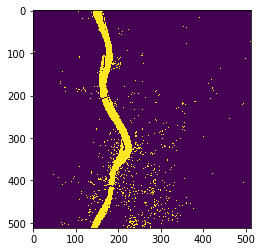

In [30]:
plt.imshow(final_image)